In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# START

## Data Cleaning

In [9]:
#  load nbaPlayersAllTimesAgilityData.csv and nbaPlayersAllTimesInfoData
dfAg = pd.read_csv('nbaPlayersAllTimesAgilityData.csv')
dfIn = pd.read_csv('nbaPlayersAllTimesInfo.csv')

#  remove ' ' from column names /!\ invisible characters
dfAg.columns = dfAg.columns.str.replace(' ', ' ')
dfIn.columns = dfIn.columns.str.replace(' ', ' ')

# remane colum Player to PLAYER
dfIn = dfIn.rename(columns={'Player': 'PLAYER'})

# remove space in player
dfAg['PLAYER'] = dfAg['PLAYER'].str.replace(' ', '')
dfIn['PLAYER'] = dfIn['PLAYER'].str.replace(' ', '')

# create array with player, height, weight from dfIn and Max Vertical Leap (inches) from dfAg
dfAg = dfAg[['PLAYER', 'Max Vertical Leap (inches)', 'Standing Vertical Leap (inches)']]
dfIn = dfIn[['PLAYER', 'Height', 'Weight']]

# remove duplicates
dfAg = dfAg.drop_duplicates(subset=['PLAYER'], keep='first')
dfIn = dfIn.drop_duplicates(subset=['PLAYER'], keep='first')

# merge dfIn and dfAg where PLAYER exist in both
df = pd.merge(dfIn, dfAg, on='PLAYER')

# get the mean of player heiht



# calcul the mean from each column where value is set
maxVertLeapMean = df[df[df['Max Vertical Leap (inches)'] != '-'] != 0]['Max Vertical Leap (inches)'].astype(float).mean()
standingVertLeapMean = df[df[df['Standing Vertical Leap (inches)'] != '-'] != 0]['Standing Vertical Leap (inches)'].astype(float).mean()
heightMean = df[df[df['Height'] != '-'] != 0]['Height'].astype(float).mean()
weightMean = df[df[df['Weight'] != '-'] != 0]['Weight'].astype(float).mean()

# set set value to the mean where the value is not set
# replace 0 by the mean
df['Max Vertical Leap (inches)'] = df['Max Vertical Leap (inches)'].replace(0, maxVertLeapMean)
df['Standing Vertical Leap (inches)'] = df['Standing Vertical Leap (inches)'].replace(0, standingVertLeapMean)
df['Height'] = df['Height'].replace(0, heightMean)
df['Weight'] = df['Weight'].replace(0, weightMean)

# replace '-' by mean
df['Max Vertical Leap (inches)'] = df['Max Vertical Leap (inches)'].replace('-', maxVertLeapMean)
df['Standing Vertical Leap (inches)'] = df['Standing Vertical Leap (inches)'].replace('-', standingVertLeapMean)
df['Height'] = df['Height'].replace('-', heightMean)
df['Weight'] = df['Weight'].replace('-', weightMean)


# convert inch to meters and round to decimal
df['Max Vertical Leap (inches)'] = df['Max Vertical Leap (inches)'].apply(pd.to_numeric)
df['Max Vertical Leap (meters)'] = round(df['Max Vertical Leap (inches)'] * 0.0254, 2)

# convert inch to meters and round to decimal
df['Standing Vertical Leap (inches)'] = df['Standing Vertical Leap (inches)'].apply(pd.to_numeric)
df['Standing Vertical Leap (meters)'] = round(df['Standing Vertical Leap (inches)'] * 0.0254, 2)

# convert height to meters and round to decimal
df['Height'] = df['Height'].apply(pd.to_numeric)
df['Height'] = round(df['Height'] / 100, 2)

# add max jump height in meters
df['Max Jump Height (meters)'] = round(df['Max Vertical Leap (meters)'] + df['Height'], 2)



# get correlation
df1 = df[['Max Jump Height (meters)', 'Standing Vertical Leap (meters)','Max Vertical Leap (meters)', 'Height', 'Weight']]
df1 = df1.corr()

## Data Analysis

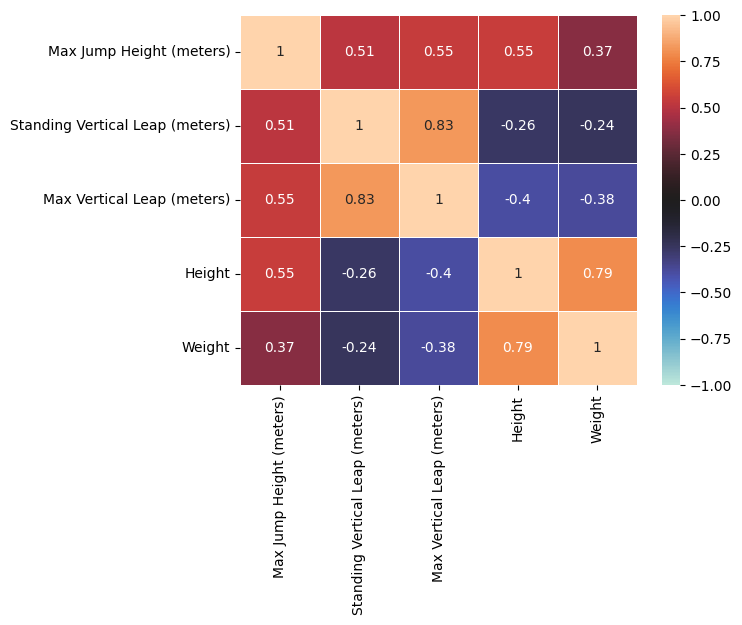

In [10]:
#  scalling of values
df1['Max Vertical Leap (meters)'] = df1['Max Vertical Leap (meters)'] / df1['Max Vertical Leap (meters)'].max()
df1['Standing Vertical Leap (meters)'] = df1['Standing Vertical Leap (meters)'] / df1['Standing Vertical Leap (meters)'].max()
df1['Max Jump Height (meters)'] = df1['Max Jump Height (meters)'] / df1['Max Jump Height (meters)'].max()
df1['Height'] = df1['Height'] / df1['Height'].max()
df1['Weight'] = df1['Weight'] / df1['Weight'].max()

# plot correlation
sns.heatmap(df1, annot=True, vmin=-1, vmax=1, center= 0,linewidths=.5)
plt.show()

> - interessant on voit que le poids a un petit impact positif sur la hauteur de saut (max jump height)
> - le poids a aussi un faible impact négatif sur la hauteur de saut (max vertical leap)
> - mais un faible impact positif sur la hauteur de saut (max jump height)
> - or la taille a un impact positif sur la hauteur de saut (max jump leap)
> - et le poid est fortement corrélé a la taille
> - donc le joueur grand on un desavantage sur le saut (sol -> pied) mais qui est compensé par un avantage sur le saut (sol -> tete)

<AxesSubplot: xlabel='PLAYER', ylabel='Max Jump Height (meters)'>

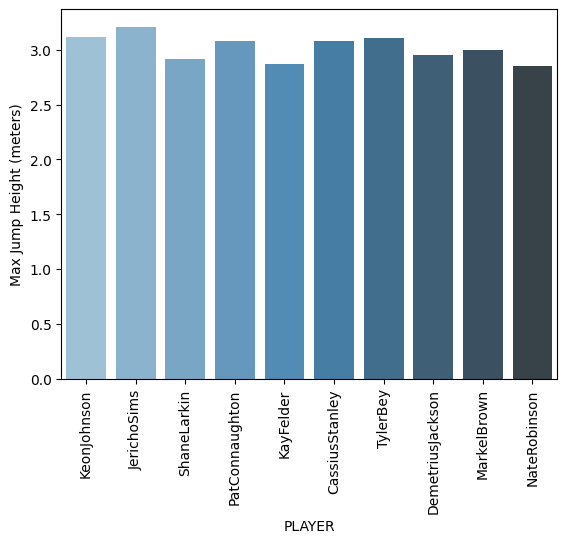

In [11]:
# find the player heights for the top 10 max jump height
df2 = df.sort_values(by=['Max Vertical Leap (meters)'], ascending=False)
df2 = df2.head(10)
df2 = df2[['PLAYER', 'Max Jump Height (meters)','Max Vertical Leap (meters)', 'Height', 'Weight']]

# plot the top 10 max jump height
plt.xticks(rotation=90)
sns.barplot(x='PLAYER', y='Max Jump Height (meters)', data=df2, palette='Blues_d', )


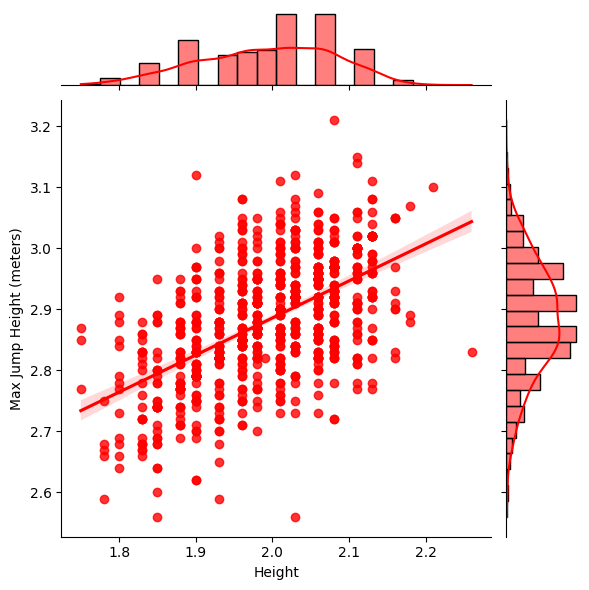

In [12]:
# on voit que les joueurs qui sautent le plus haut(sol tete) ne sont pas ceux qui sautent le plus haut (sol pieds) meme s'il y correlation
sns.jointplot(x='Height', y='Max Jump Height (meters)', data=df, kind='reg', color='r')
plt.show()

> - la taille est un avantage au debut puis apres une certaine taille c'est un desavantage
>
> - plus on est grand plus on saute haut (sol -> tete) mais arrivé a une certaine taille on perd en hauteur de saut (sol -> pied)

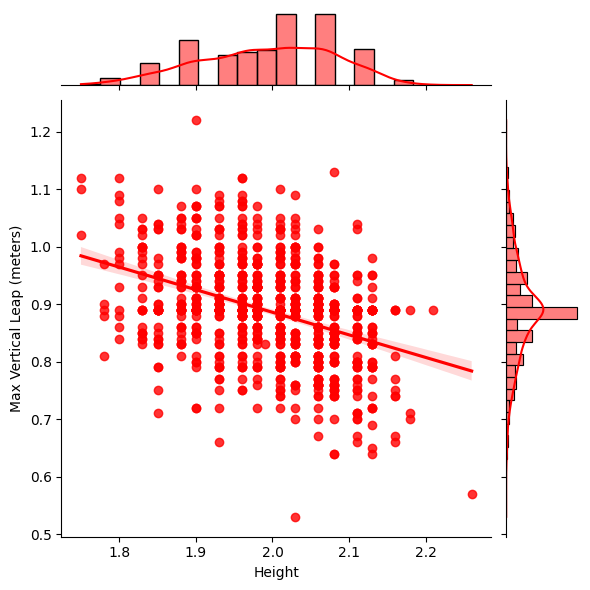

In [13]:
sns.jointplot(x='Height', y='Max Vertical Leap (meters)', data=df, kind='reg', color='r')
plt.show()

> au contraire la taille semble toujours être un désavantage pour la hauteur de saut (sol -> pied)

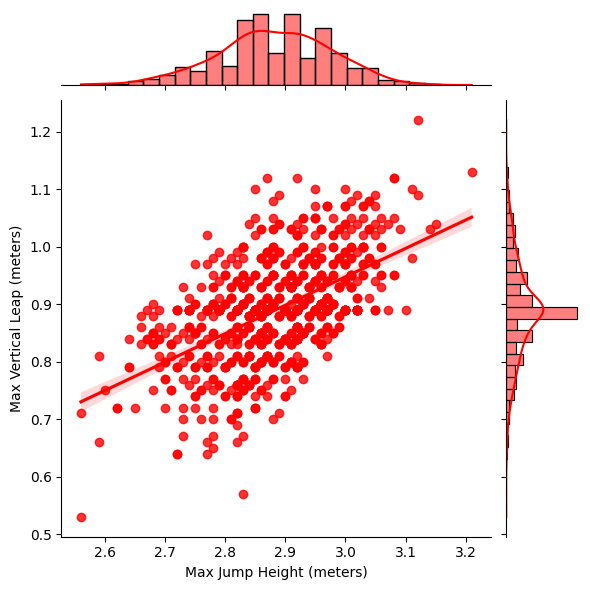

In [14]:
sns.jointplot(x='Max Jump Height (meters)', y='Max Vertical Leap (meters)', data=df, kind='reg', color='r')
plt.show()

---
**Conclusion**

Les joueurs grands sont avantagés sur les sauts (sol -> tête) mais désavantagés sur les sauts (sol -> pied).

conclusion l'avantage donné par la taille sur les sauts (sol -> tête) n'est pas entièrement compensé par le un désavantage donné sur le saut (sol -> pied).

Dans l'ensemble les joueurs grands restent ceux qui sautent le plus haut (sol -> tête) mais qui sautent moins haut (sol -> pied).


---